In [31]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

In [2]:
import pandas as pd

df = pd.read_csv('./data/smart_phone_raw_data.csv')
print(df.shape)
df.head(3)

(28575, 179)


,ID,DM1,DM2,DM3,DM4,KK1,KK2,WT,Q1A_1,Q1A_2,...,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_10,Q21
0,1,3,1,NaN,1,3,NaN,1581.361297,1,1,...,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0
1,2,3,2,NaN,1,3,NaN,1506.828478,1,1,...,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0
2,3,2,1,3.0,1,2,2.0,1380.620423,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['ID', 'DM1', 'DM2', 'DM3', 'DM4', 'KK1', 'KK2', 'WT', 'Q1A_1', 'Q1A_2',
       ...
       'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5', 'Q20_6', 'Q20_7', 'Q20_8', 'Q20_9',
       'Q20_10', 'Q21'],
      dtype='object', length=179)

In [73]:
media_df = df[['Q16_1','Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17_1','Q17_2','Q17_3','Q17_4','Q17_5','Q17_6','Q17_7', 'DM4', 'KK2', 'KK1']]

In [74]:
media_df

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,DM4,KK2,KK1
0,3,3,2,3,3,2,3,2,3,3,2,3,3,2,3,3,1,NaN,3
1,3,3,2,3,3,2,3,3,2,2,3,3,2,2,3,2,1,NaN,3
2,2,2,3,2,2,2,3,2,2,3,2,2,3,3,2,2,1,2.0,2
3,2,2,3,2,3,2,3,3,2,2,2,3,3,2,2,3,1,2.0,3
4,2,2,3,2,3,2,3,3,2,3,2,2,3,3,2,3,1,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28570,3,3,3,3,4,2,3,3,2,3,2,2,2,3,3,3,1,NaN,3
28571,3,2,3,3,3,3,2,3,3,3,2,2,3,3,2,3,1,2.0,3
28572,4,3,2,2,3,3,4,4,2,4,4,3,3,3,4,3,1,2.0,3
28573,3,1,2,2,2,2,3,2,2,3,2,3,3,2,2,2,3,NaN,2


###  디지털 사용 역량과 과의존

In [21]:
digital_df = df[['Q16_1','Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6']]

In [22]:
digital_df['mean'] = digital_df.mean(axis=1)

<ipython-input-22-7cf9fb261dba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital_df['mean'] = digital_df.mean(axis=1)


In [23]:
digital_df

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,mean
0,3,3,2,3,3,2,2.666667
1,3,3,2,3,3,2,2.666667
2,2,2,3,2,2,2,2.166667
3,2,2,3,2,3,2,2.333333
4,2,2,3,2,3,2,2.333333
...,...,...,...,...,...,...,...
28570,3,3,3,3,4,2,3.000000
28571,3,2,3,3,3,3,2.833333
28572,4,3,2,2,3,3,2.833333
28573,3,1,2,2,2,2,2.000000


In [33]:
digital_df['KK1'] = media_df['KK1']

<ipython-input-33-68a30316ab2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital_df['KK1'] = media_df['KK1']


In [38]:
digital_df = digital_df[['mean', 'KK1']]

In [40]:
d_corr = digital_df.corr(method='pearson')

In [41]:
d_corr

,mean,KK1
mean,1.00000,-0.07664
KK1,-0.07664,1.00000


### 피어슨 상관계수
- 값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계
- 값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계
- 값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계
- 값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계
- 값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계
- 값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계
- 값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계

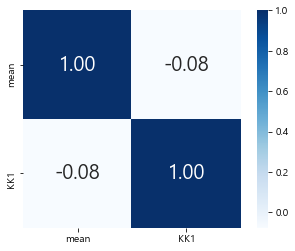

In [49]:
d_heatmap = sns.heatmap(d_corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

### 가족/사회와의 관계와 과의존

In [24]:
family_df = df[['Q16_7', 'Q16_8', 'Q16_9']]
family_df['mean'] = family_df.mean(axis=1)
family_df

<ipython-input-24-6670188c59d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df['mean'] = family_df.mean(axis=1)


,Q16_7,Q16_8,Q16_9,mean
0,3,2,3,2.666667
1,3,3,2,2.666667
2,3,2,2,2.333333
3,3,3,2,2.666667
4,3,3,2,2.666667
...,...,...,...,...
28570,3,3,2,2.666667
28571,2,3,3,2.666667
28572,4,4,2,3.333333
28573,3,2,2,2.333333


In [50]:
family_df['KK1'] = media_df['KK1']

<ipython-input-50-331d24786cee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df['KK1'] = media_df['KK1']


In [51]:
family_df

,Q16_7,Q16_8,Q16_9,mean,KK1
0,3,2,3,2.666667,3
1,3,3,2,2.666667,3
2,3,2,2,2.333333,2
3,3,3,2,2.666667,3
4,3,3,2,2.666667,3
...,...,...,...,...,...
28570,3,3,2,2.666667,3
28571,2,3,3,2.666667,3
28572,4,4,2,3.333333,3
28573,3,2,2,2.333333,2


In [52]:
family_df = family_df[['mean', 'KK1']]

In [53]:
f_corr = family_df.corr(method='pearson')

In [54]:
f_corr

,mean,KK1
mean,1.000000,-0.026634
KK1,-0.026634,1.000000


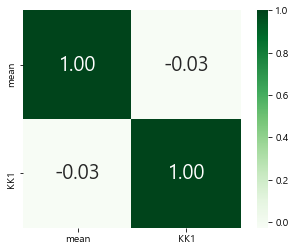

In [72]:
f_heatmap = sns.heatmap(f_corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Greens')

### 삶의 만족도와 과의존

In [64]:
life_df = df[['Q17_1','Q17_2','Q17_3','Q17_4','Q17_5','Q17_6','Q17_7']]
life_df['mean'] = life_df.mean(axis=1)
life_df

<ipython-input-64-da1e34527a84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_df['mean'] = life_df.mean(axis=1)


,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,mean
0,3,2,3,3,2,3,3,2.714286
1,2,3,3,2,2,3,2,2.428571
2,3,2,2,3,3,2,2,2.428571
3,2,2,3,3,2,2,3,2.428571
4,3,2,2,3,3,2,3,2.571429
...,...,...,...,...,...,...,...,...
28570,3,2,2,2,3,3,3,2.571429
28571,3,2,2,3,3,2,3,2.571429
28572,4,4,3,3,3,4,3,3.428571
28573,3,2,3,3,2,2,2,2.428571


In [66]:
life_df['KK1'] = media_df['KK1']

<ipython-input-66-784ba4ced27b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_df['KK1'] = media_df['KK1']


In [67]:
life_df = life_df[['mean', 'KK1']]

In [68]:
l_corr = life_df.corr(method='pearson')

In [69]:
l_corr

,mean,KK1
mean,1.000000,0.024389
KK1,0.024389,1.000000


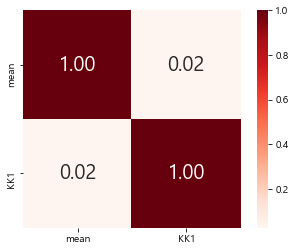

In [71]:
l_heatmap = sns.heatmap(l_corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Reds')

### 도시규모와 과의존

In [75]:
city_df = media_df[['DM4','KK1']]
city_df

,DM4,KK1
0,1,3
1,1,3
2,1,2
3,1,3
4,1,3
...,...,...
28570,1,3
28571,1,3
28572,1,3
28573,3,2


In [76]:
c_corr = city_df.corr(method='pearson')

In [77]:
c_corr

,DM4,KK1
DM4,1.000000,0.019047
KK1,0.019047,1.000000


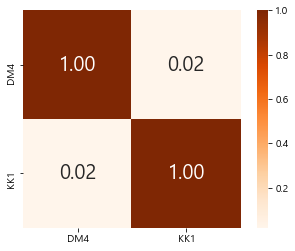

In [78]:
c_heatmap = sns.heatmap(c_corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Oranges')

### 부모의 과의존 여부와 과의존

In [79]:
parents_df = media_df[['KK2','KK1']]
parents_df

,KK2,KK1
0,NaN,3
1,NaN,3
2,2.0,2
3,2.0,3
4,NaN,3
...,...,...
28570,NaN,3
28571,2.0,3
28572,2.0,3
28573,NaN,2


In [80]:
parents_df['KK2'].fillna(0, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [81]:
parents_df

,KK2,KK1
0,0.0,3
1,0.0,3
2,2.0,2
3,2.0,3
4,0.0,3
...,...,...
28570,0.0,3
28571,2.0,3
28572,2.0,3
28573,0.0,2


In [82]:
p_corr = parents_df.corr(method='pearson')

In [83]:
p_corr

,KK2,KK1
KK2,1.00000,-0.08033
KK1,-0.08033,1.00000


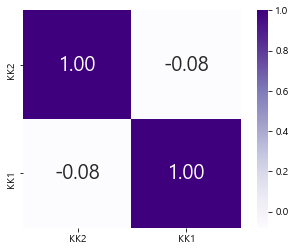

In [86]:
p_heatmap = sns.heatmap(p_corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Purples')